# Explore and Analyse

In [54]:
library(e1071)   
library(psych)
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(sqldf)
library(semTools)
library(pastecs)
library(sjstats) 
library(userfriendlyscience)


Attaching package: ‘sjstats’


The following object is masked from ‘package:psych’:

    phi




In [2]:
data <- read.csv("../Data/sperformance-dataset.csv", na.strings=c("na"," ","",".","NA"), header = TRUE)

In [3]:
hyp1_score_data <- sqldf("select mg1,mg2,mg3,pg1,pg2,pg3 from data where mg1 > 0 and mg2 > 0 and mg3 > 0 and pg1 > 0 and pg2 > 0 and pg3 > 0")

In [4]:
# Better form of summary statisitcs in R usinf the psych library
describe(hyp1_score_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mG1,1,339,11.28614,3.238656,11,11.20147,2.9652,3,19,16,0.2170753,-0.6882045,0.1758996
mG2,2,339,11.43953,3.186283,11,11.36996,2.9652,5,19,14,0.2045831,-0.5807718,0.1730551
mG3,3,339,11.61947,3.258086,11,11.54579,2.9652,4,20,16,0.2171227,-0.4787855,0.1769549
pG1,4,339,12.36578,2.414602,12,12.31868,2.9652,7,19,12,0.1351383,-0.3976246,0.1311432
pG2,5,339,12.47493,2.398555,12,12.38828,2.9652,7,19,12,0.3309515,-0.3780097,0.1302716
pG3,6,339,12.82301,2.582016,13,12.79853,2.9652,1,19,18,-0.1946088,0.7633917,0.1402359


In [5]:
plot_list <- list()
for(i in colnames(hyp1_score_data)){
    print(mean(hyp1_score_data[,i]))
    gg <- ggplot(hyp1_score_data , aes_string(i))  
    gg <- gg + geom_histogram(binwidth=1, colour="black", aes(y=..density.., fill=..count..))
    gg<-gg+scale_fill_gradient("Count", low="#DCDCDC", high="#7C7C7C")
    gg<-gg+stat_function(fun=dnorm, color="red",args=list(mean=mean(hyp1_score_data[,i], na.rm=TRUE), sd=sd(hyp1_score_data[,i], na.rm=TRUE)))
    plot_list[[i]] <- gg
} # end of loop

[1] 11.28614
[1] 11.43953
[1] 11.61947
[1] 12.36578
[1] 12.47493
[1] 12.82301


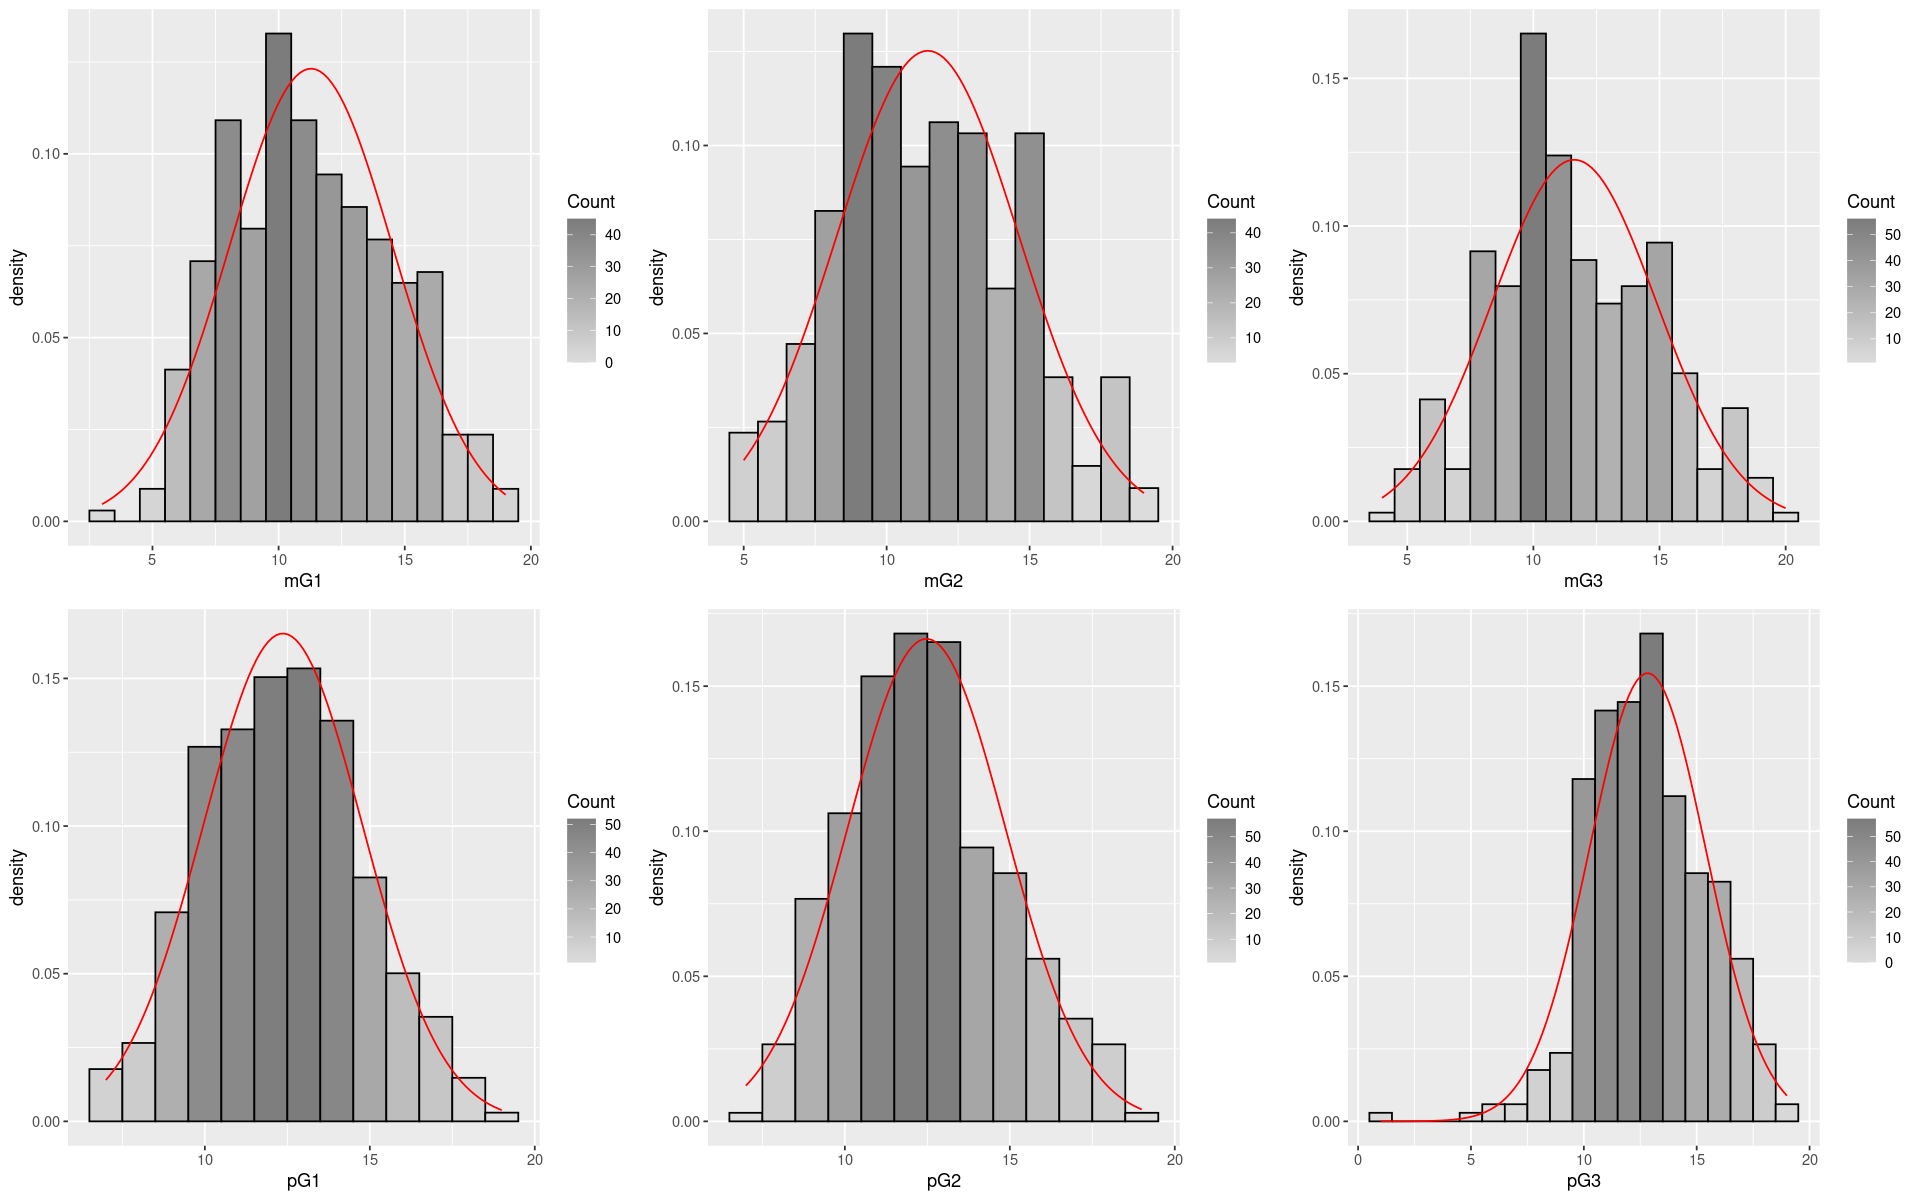

In [6]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(plotlist = plot_list)

ERROR: Error in qqnorm(hyp1_score_data$mG1, main = "mG1") + qqline(hyp1_score_data$mG1, : non-numeric argument to binary operator


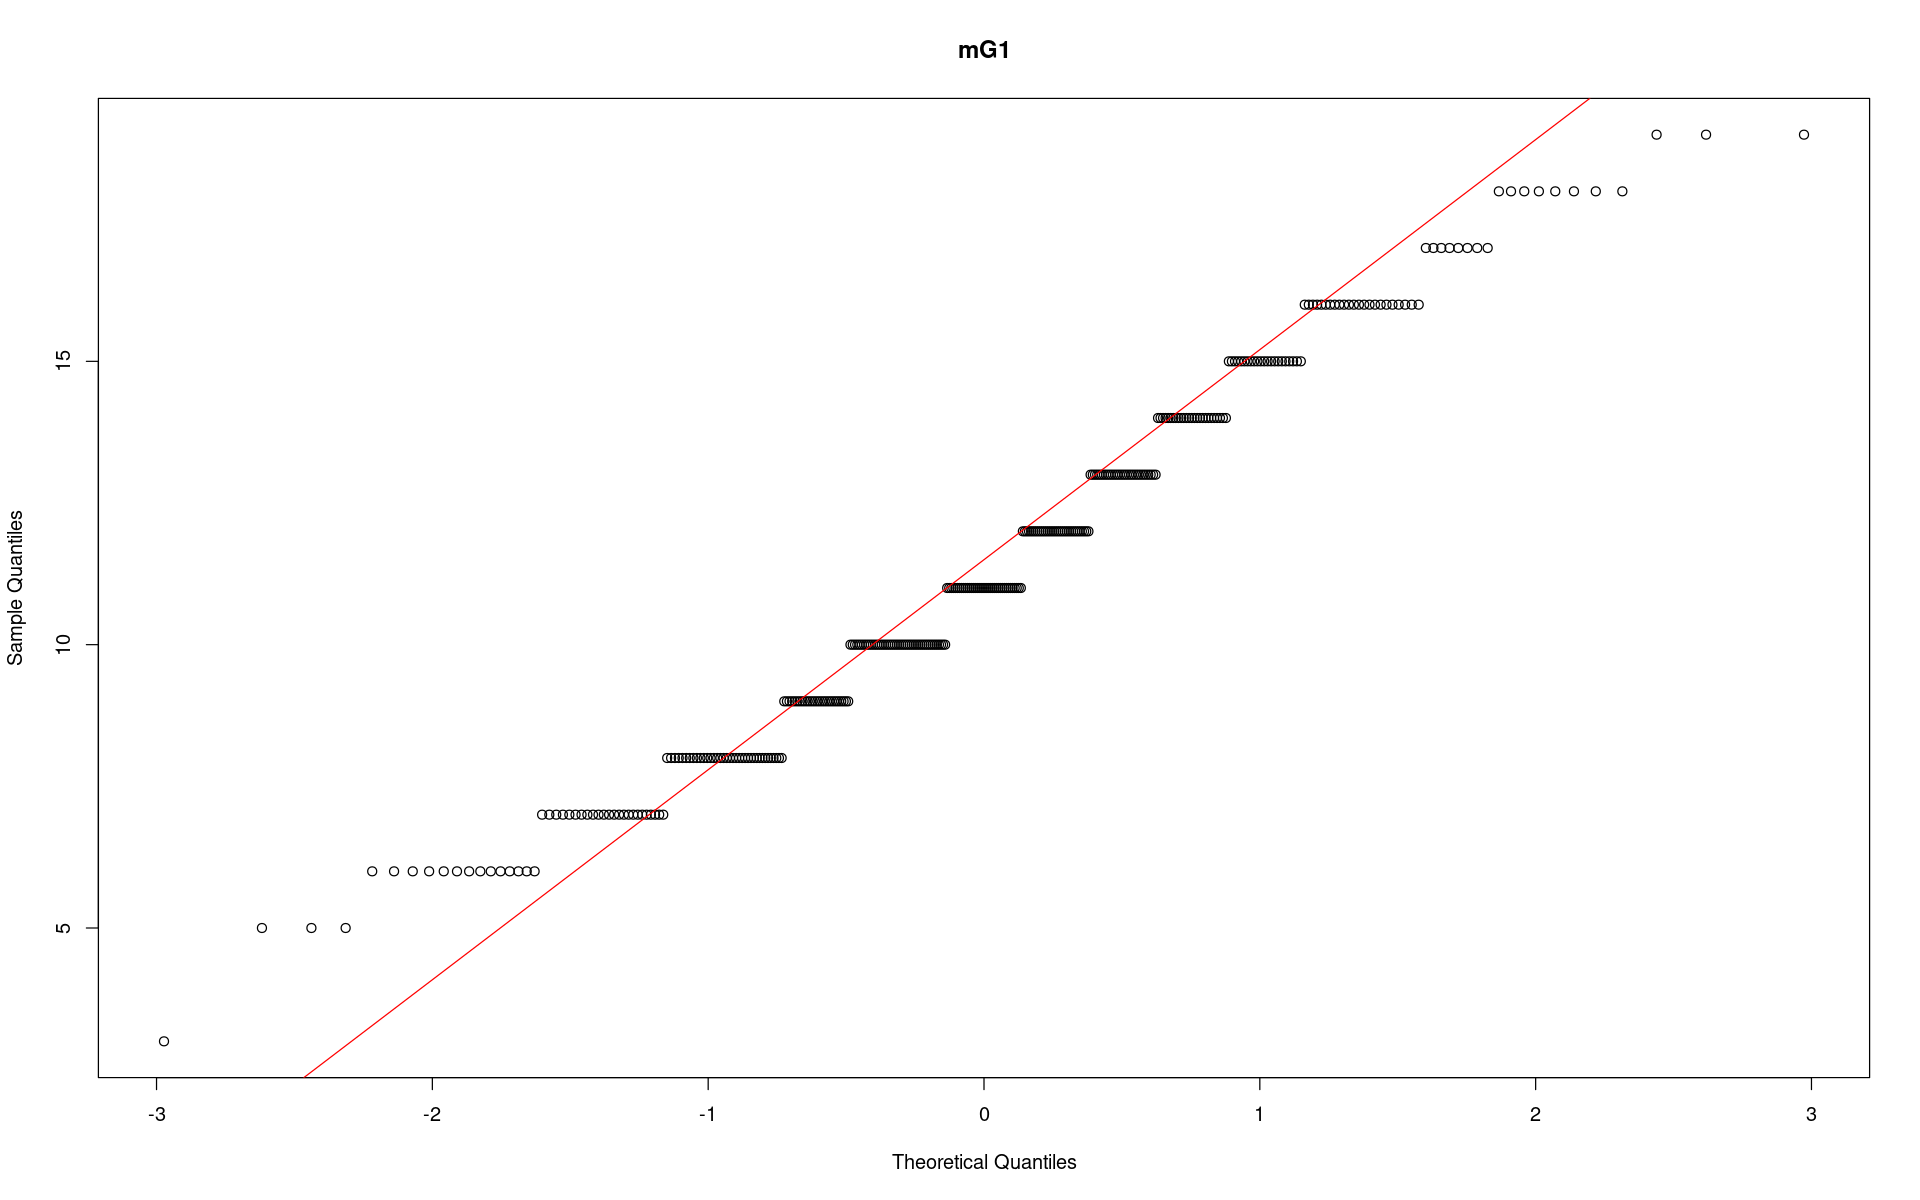

In [7]:
# qq plot
qqnorm(hyp1_score_data$mG1 ,main='mG1')+qqline(hyp1_score_data$mG1, col=2) #show a line on theplot


ERROR: Error in qqnorm(hyp1_score_data$mG2, main = "mG2") + qqline(hyp1_score_data$mG2, : non-numeric argument to binary operator


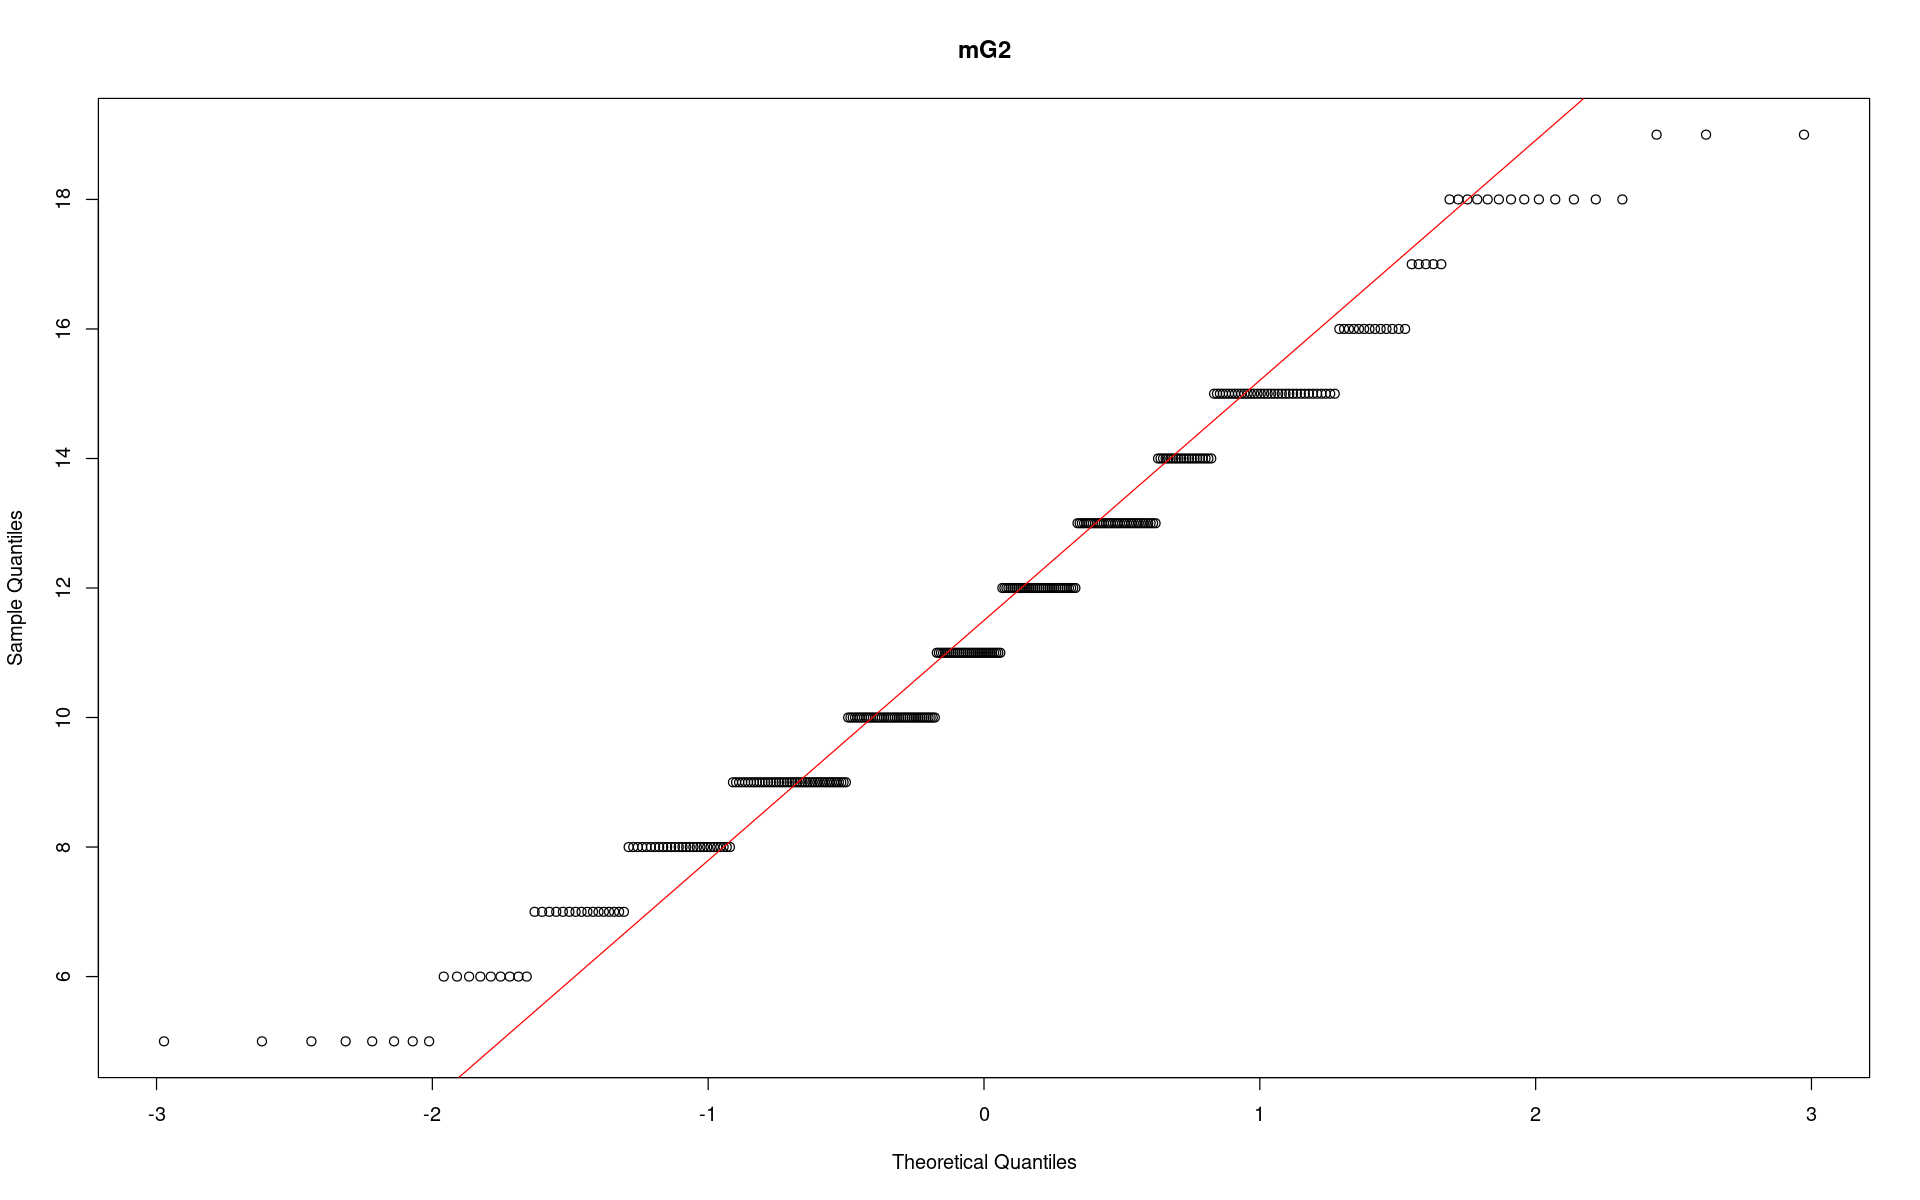

In [8]:
qqnorm(hyp1_score_data$mG2,main='mG2')+qqline(hyp1_score_data$mG2, col=2)


ERROR: Error in qqnorm(hyp1_score_data$mG3, main = "mG3") + qqline(hyp1_score_data$mG3, : non-numeric argument to binary operator


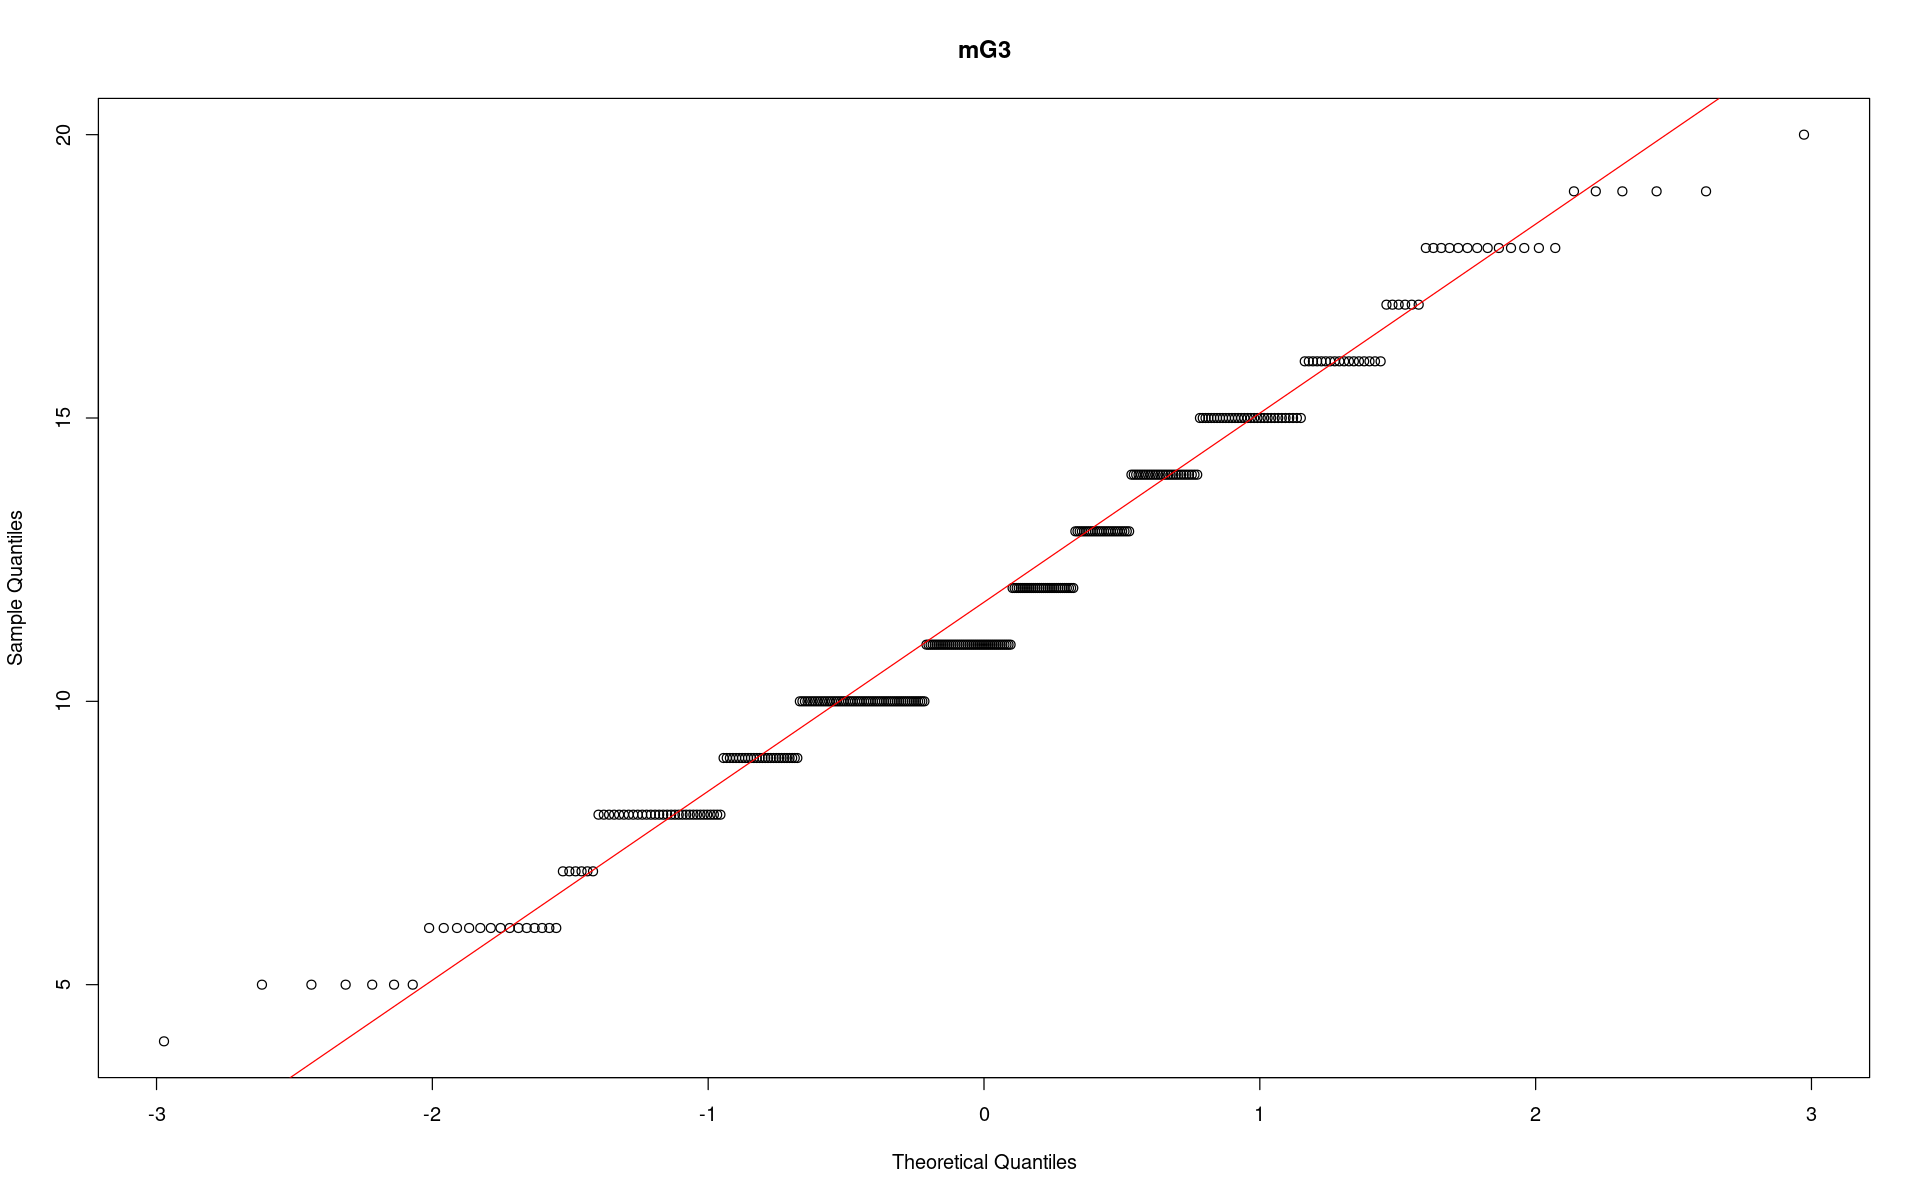

In [9]:
qqnorm(hyp1_score_data$mG3,main='mG3')+qqline(hyp1_score_data$mG3, col=2)

In [10]:
# Get the Kurtosis and Skew values
mG1_skew <- semTools::skew(hyp1_score_data$mG1)
mG1_kurt <- semTools::kurtosis(hyp1_score_data$mG1)

# standardise the values
mG1_skew[1]/mG1_skew[2]
mG1_kurt[1]/mG1_kurt[2]

skew (g1) 
 1.646218

Excess Kur (g2) 
      -2.505487

In [11]:
# Get the Kurtosis and Skew values
mG2_skew <- semTools::skew(hyp1_score_data$mG2)
mG2_kurt <- semTools::kurtosis(hyp1_score_data$mG2)

# standardise the values
mG2_skew[1]/mG2_skew[2]
mG2_kurt[1]/mG2_kurt[2]

skew (g1) 
 1.551482

Excess Kur (g2) 
      -2.093272

In [12]:
# Get the Kurtosis and Skew values
mG3_skew <- semTools::skew(hyp1_score_data$mG3)
mG3_kurt <- semTools::kurtosis(hyp1_score_data$mG3)

# standardise the values
mG3_skew[1]/mG3_skew[2]
mG3_kurt[1]/mG3_kurt[2]

skew (g1) 
 1.646578

Excess Kur (g2) 
      -1.701956

In [13]:
mG1<- abs(scale(hyp1_score_data$mG1))

FSA::perc(as.numeric(mG1), 1.96, "gt")
FSA::perc(as.numeric(mG1), 3.29, "gt")

[1] 3.539823

[1] 0

In [14]:
mG2<- abs(scale(hyp1_score_data$mG2))

FSA::perc(as.numeric(mG2), 1.96, "gt")
FSA::perc(as.numeric(mG2), 3.29, "gt")

[1] 7.079646

[1] 0

In [15]:
mG1<- abs(scale(hyp1_score_data$mG3))

FSA::perc(as.numeric(mG1), 1.96, "gt")
FSA::perc(as.numeric(mG1), 3.29, "gt") #0%

[1] 3.834808

[1] 0

Warning message:
“Use of `hyp1_score_data$mG1` is discouraged. Use `mG1` instead.”
Warning message:
“Use of `hyp1_score_data$mG3` is discouraged. Use `mG3` instead.”
Warning message:
“Use of `hyp1_score_data$mG1` is discouraged. Use `mG1` instead.”
Warning message:
“Use of `hyp1_score_data$mG3` is discouraged. Use `mG3` instead.”
`geom_smooth()` using formula 'y ~ x'



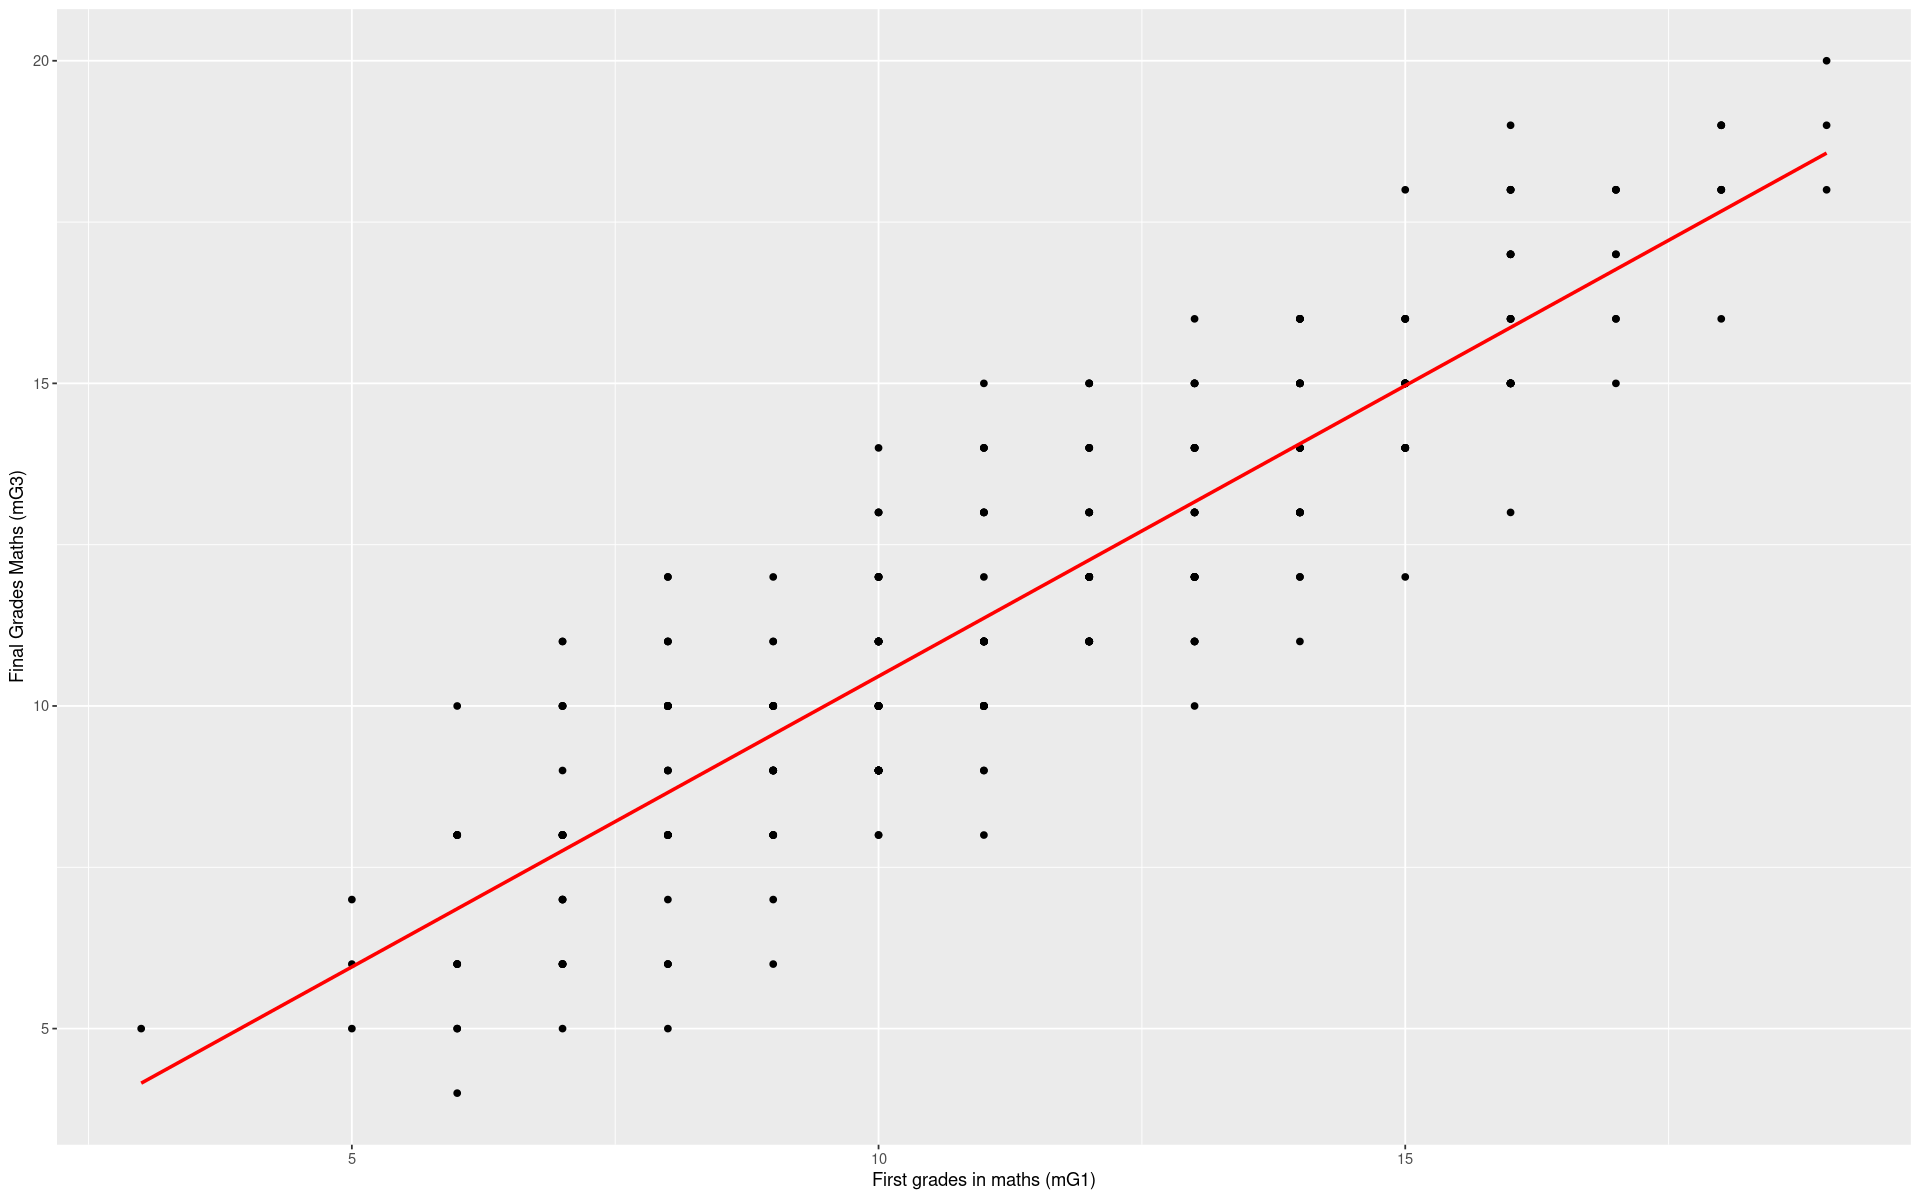

In [16]:
#Scatterplot relationship 
scatter <- ggplot(hyp1_score_data, aes(hyp1_score_data$mG1, hyp1_score_data$mG3))

#Add a regression line
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red", se = F) + labs(x = "First grades in maths (mG1)", y = "Final Grades Maths (mG3)") 


Warning message:
“Use of `hyp1_score_data$mG2` is discouraged. Use `mG2` instead.”
Warning message:
“Use of `hyp1_score_data$mG3` is discouraged. Use `mG3` instead.”
Warning message:
“Use of `hyp1_score_data$mG2` is discouraged. Use `mG2` instead.”
Warning message:
“Use of `hyp1_score_data$mG3` is discouraged. Use `mG3` instead.”
`geom_smooth()` using formula 'y ~ x'



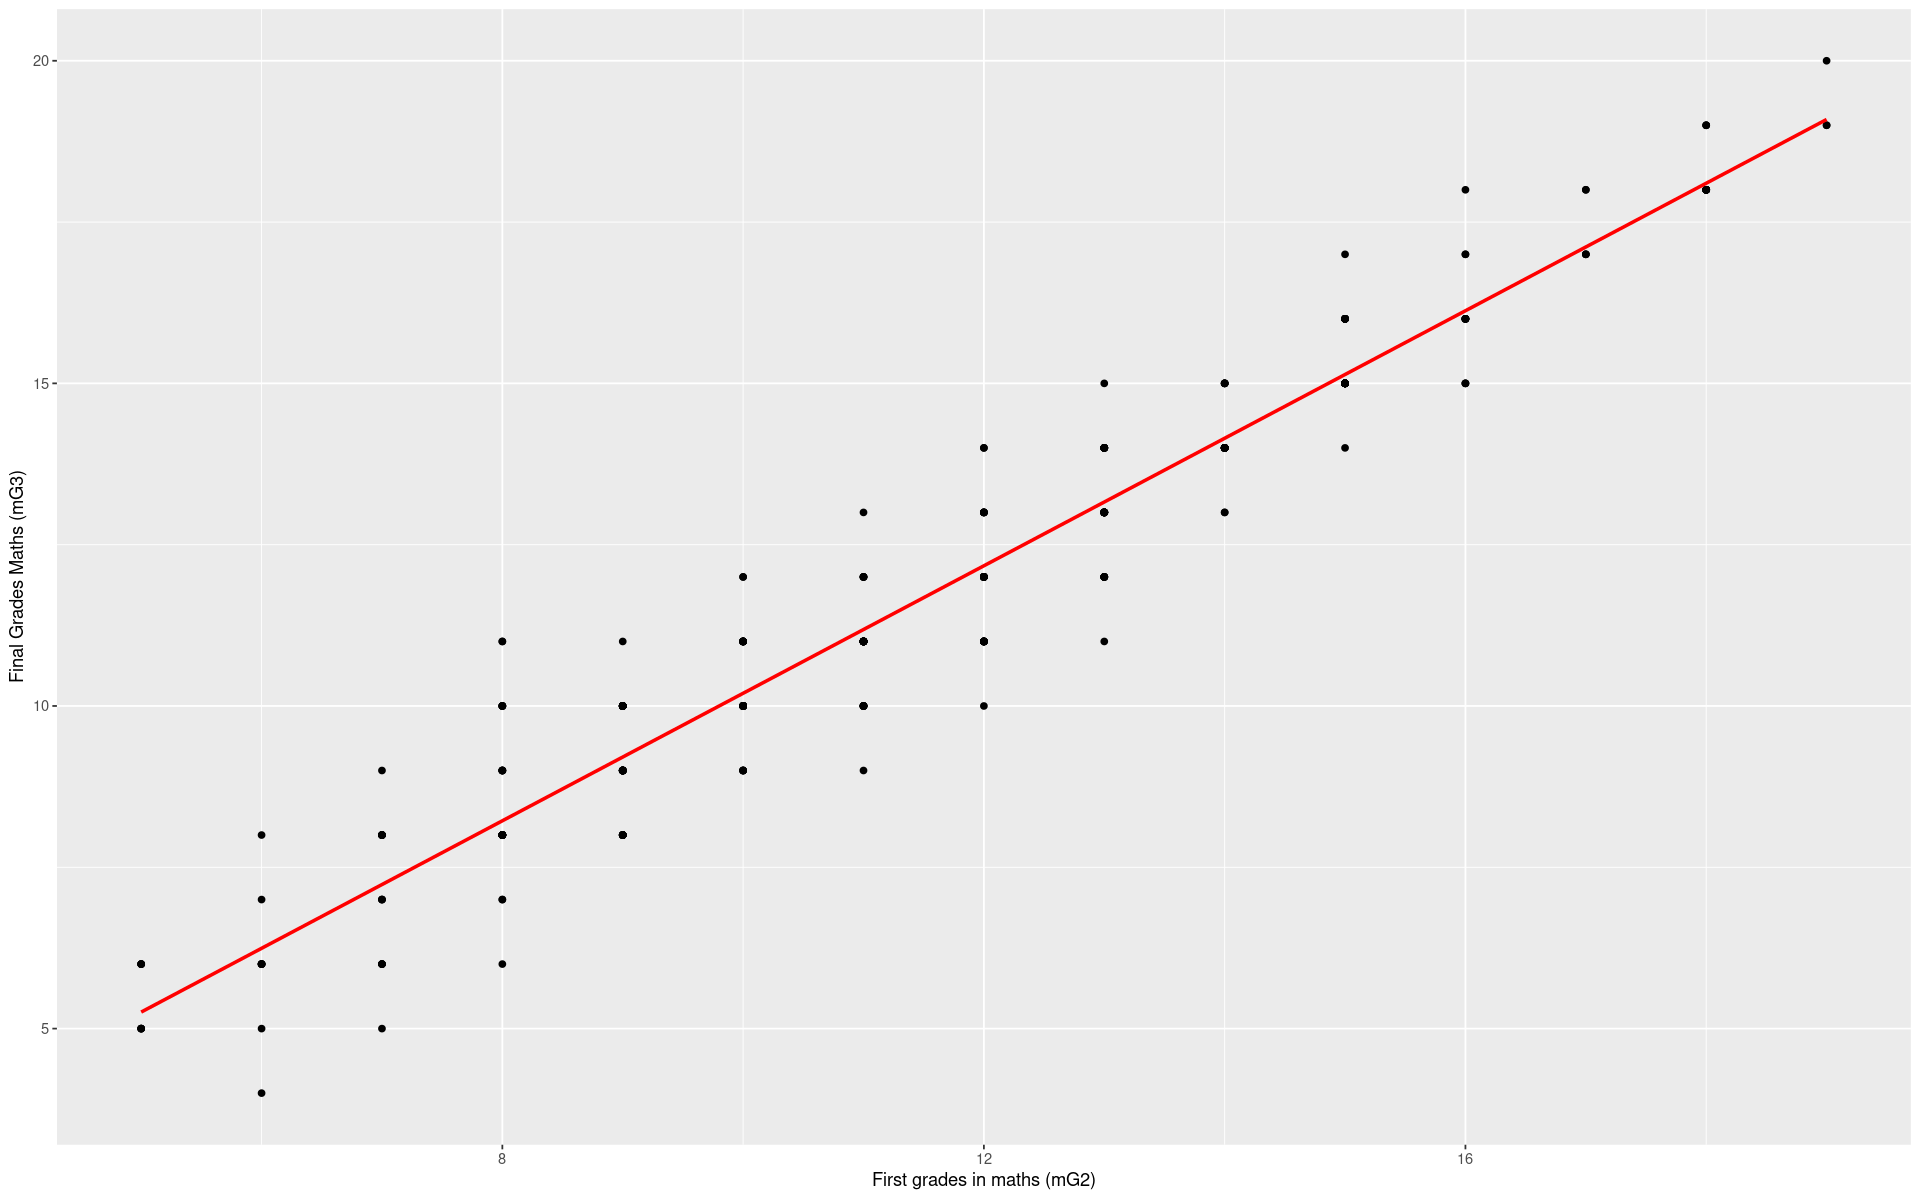

In [17]:
#Scatterplot relationship 
scatter <- ggplot(hyp1_score_data, aes(hyp1_score_data$mG2, hyp1_score_data$mG3))

#Add a regression line
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red", se = F) + labs(x = "First grades in maths (mG2)", y = "Final Grades Maths (mG3)") 


In [18]:
#Pearson test
stats::cor.test(hyp1_score_data$mG1, hyp1_score_data$mG3, method='pearson')


	Pearson's product-moment correlation

data:  hyp1_score_data$mG1 and hyp1_score_data$mG3
t = 36.943, df = 337, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8722090 0.9147845
sample estimates:
      cor 
0.8955274 


In [19]:
#Pearson test
stats::cor.test(hyp1_score_data$mG2, hyp1_score_data$mG3, method='pearson')


	Pearson's product-moment correlation

data:  hyp1_score_data$mG2 and hyp1_score_data$mG3
t = 68.944, df = 337, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9584693 0.9727246
sample estimates:
      cor 
0.9663306 


In [20]:
t_test_data <- sqldf("select * from data where mg1 > 0 and mg2 > 0 and mg3 > 0 and pg1 > 0 and pg2 > 0 and pg3 > 0")

In [21]:
colnames(t_test_data)

[1] "school"       "sex"          "age"          "address"      "famsize"     
 [6] "Pstatus"      "Medu"         "Fedu"         "Mjob"         "Fjob"        
[11] "reason"       "nursery"      "internet"     "guardian.m"   "traveltime.m"
[16] "studytime.m"  "failures.m"   "schoolsup.m"  "famsup.m"     "paid.m"      
[21] "activities.m" "higher.m"     "romantic.m"   "famrel.m"     "freetime.m"  
[26] "goout.m"      "Dalc.m"       "Walc.m"       "health.m"     "absences.m"  
[31] "mG1"          "mG2"          "mG3"          "guardian.p"   "traveltime.p"
[36] "studytime.p"  "failures.p"   "schoolsup.p"  "famsup.p"     "paid.p"      
[41] "activities.p" "higher.p"     "romantic.p"   "famrel.p"     "freetime.p"  
[46] "goout.p"      "Dalc.p"       "Walc.p"       "health.p"     "absences.p"  
[51] "pG1"          "pG2"          "pG3"

In [22]:
# Performing T-test
# Describe the variables
psych::describeBy(t_test_data$mG3, t_test_data$sex, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,F,1,173,11.16185,3.230908,11,11.10072,2.9652,4,19,15,0.2429386,-0.4505928,0.2456414
X12,2,M,1,166,12.09639,3.227212,12,11.99254,2.9652,5,20,15,0.2030577,-0.5528532,0.2504802


In [23]:
# Using levene's test to test variance
car::leveneTest(mG3 ~ sex, data=t_test_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.1174772,0.7320007
,337,NA,NA


In [24]:
# Perfomring the T-test
stats::t.test(mG3~sex,var.equal=TRUE,data=t_test_data)


	Two Sample t-test

data:  mG3 by sex
t = -2.6637, df = 337, p-value = 0.008099
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6246401 -0.2444316
sample estimates:
mean in group F mean in group M 
       11.16185        12.09639 


In [25]:
# Performing Cohen's d
res <- stats::t.test(mG3~sex,var.equal=TRUE,data=t_test_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.2902063,0.95,-0.5046456,-0.07534096


In [26]:
# T-Test for the second hypothesis involving more than two groups
# Describe the variables
psych::describeBy(t_test_data$mG3, t_test_data$guardian.m, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,father,1,80,12.01250,3.111814,12,11.96875,2.9652,6,18,12,0.1179412,-0.68603448,0.3479114
X12,2,mother,1,247,11.55466,3.291410,11,11.49749,2.9652,4,20,16,0.2055520,-0.40579923,0.2094274
X13,3,other,1,12,10.33333,3.366502,9,9.80000,1.4826,8,18,10,1.2425381,0.01571511,0.9718253


In [27]:
# Using levene's test to test variance
car::leveneTest(mG3 ~ guardian.m, data=t_test_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.3119396,0.7322375
,336,NA,NA


In [56]:
# Anova test for Hypothesis dealing with mG1 andf traveltime.m
# Check the statistical description of variable of interest
psych::describeBy(t_test_data$mG3, t_test_data$traveltime.m, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,228,11.82456,3.378464,11,11.79348,4.4478,4,20,16,0.08859156,-0.5416650,0.2237443
X12,2,2,1,88,11.32955,3.016131,11,11.20833,2.9652,6,19,13,0.40976888,-0.4261710,0.3215207
X13,3,3,1,16,11.00000,3.098387,10,10.85714,2.9652,6,18,12,0.56733154,-0.4202474,0.7745967
X14,4,4,1,7,10.00000,1.825742,10,10.00000,1.4826,7,13,6,0.00000000,-0.8914286,0.6900656


In [57]:
# performing Barrets test for homogenity of variance
stats::bartlett.test(mG3~ traveltime.m, data=t_test_data)


	Bartlett test of homogeneity of variances

data:  mG3 by traveltime.m
Bartlett's K-squared = 4.3832, df = 3, p-value = 0.2229


In [59]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(t_test_data$traveltime.m),y=t_test_data$mG3,posthoc='Tukey')

In [60]:
anova_result

### Oneway Anova for y=mG3 and x=traveltime.m (groups: 1, 2, 3, 4)

Omega squared: 95% CI = [NA; .04], point estimate = 0
Eta Squared: 95% CI = [0; .03], point estimate = .01

                                     SS  Df    MS    F    p
Between groups (error + effect)   41.49   3 13.83 1.31 .272
Within groups (error only)      3546.43 335 10.59          


### Post hoc test: Tukey

    diff  lwr   upr  p adj
2-1 -0.5  -1.55 0.56 .619 
3-1 -0.82 -3    1.35 .761 
4-1 -1.82 -5.05 1.4  .462 
3-2 -0.33 -2.61 1.95 .982 
4-2 -1.33 -4.63 1.97 .726 
4-3 -1    -4.81 2.81 .905 

In [62]:
# access values in order to get f-statisitc on nect step
res2<-stats::aov(mG3~ traveltime.m, data = t_test_data)

In [64]:
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat

[1] 3.82491

In [66]:
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value

[1] 0.05132201

In [68]:
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

,etasq
,<dbl>
1,0.01122251


In [74]:
# Anova test for studytime and Final grade in portuguese
# Check the statistical description of variable of interest
psych::describeBy(t_test_data$mG3, t_test_data$studytime.p, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(mG3~ studytime.p, data=t_test_data)
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(t_test_data$studytime.p),y=t_test_data$mG3,posthoc='Tukey')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(mG3~ studytime.p, data = t_test_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,1,1,87,11.75862,3.358313,12.0,11.69014,2.9652,5,19,14,0.1525207,-0.5087621,0.3600490
X12,2,2,1,171,11.11111,3.153792,11.0,11.05109,2.9652,4,19,15,0.2384632,-0.4653474,0.2411765
X13,3,3,1,57,12.49123,3.030339,12.0,12.36170,2.9652,7,19,12,0.2770251,-0.8835984,0.4013783
X14,4,4,1,24,12.66667,3.595488,12.5,12.60000,3.7065,6,20,14,0.1579704,-0.8487557,0.7339260



	Bartlett test of homogeneity of variances

data:  mG3 by studytime.p
Bartlett's K-squared = 1.4452, df = 3, p-value = 0.695


### Oneway Anova for y=mG3 and x=studytime.p (groups: 1, 2, 3, 4)

Omega squared: 95% CI = [0; .07], point estimate = .02
Eta Squared: 95% CI = [0; .06], point estimate = .03

                                    SS  Df    MS    F    p
Between groups (error + effect) 115.51   3  38.5 3.71 .012
Within groups (error only)      3472.4 335 10.37          


### Post hoc test: Tukey

    diff  lwr   upr  p adj
2-1 -0.65 -1.74 0.45 .422 
3-1 0.73  -0.68 2.15 .541 
4-1 0.91  -1.01 2.82 .612 
3-2 1.38  0.11  2.65 .027 
4-2 1.56  -0.26 3.37 .121 
4-3 0.18  -1.85 2.2  .996 

[1] 3.059952

[1] 0.08115435

,etasq
,<dbl>
1,0.008998272
